In [3]:
### Load the libaries:

import pandas as pd 
import statistics
import seaborn as sns
import numpy as np #for summary statistics 
import matplotlib.pyplot as plt #for plotting 
from scipy.stats import ttest_ind #for statistical significance tests 
from scipy.stats import sem # for standard error


In [4]:
### SQL connection didn't work: I was getting an error that ProgrammingError: 1146 (42S02): Table 'ALY2100.USHospitalData' doesn't exist. SO, I decided to read these two tables
# By myself and join them together

## Load the data

Data1 = pd.read_csv('StateHospAllUSA.csv')
Data1

Data2 =pd.read_csv('USHospitalData.csv')
Data2

/shared/centos7/anaconda3/CPS-10-2021/envs/CPS_10_2021/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,hospital_data_id,fiscal_yr,data_ein,data_name,form_990_filed_part_grp_ret_f,form_990_num_fac_oper,form_990_name,form_990_address,form_990_city,...,pctttlexp_econdevlp,pctttlexp_cmntysuprt,pctttlexp_envrnimprv,pctttlexp_ldrdevlp,pctttlexp_cltnbldg,pctttlexp_htlhimprvadvcy,pctttlexp_wrkfrcdevlp,pctttlexp_other,pctttlexp_total,updated_dt
0,0,1,2010,630307951,Mizell Memorial Hospital,N,1,Mizell Memorial Hospital,702 N Main Street,Opp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
1,1,2,2011,630307951,Mizell Memorial Hospital,N,1,Mizell Memorial Hospital,702 N Main Street,Opp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
2,2,3,2012,630307951,Mizell Memorial Hospital,N,1,Mizell Memorial Hospital,702 N Main Street,Opp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
3,3,4,2013,630307951,Mizell Memorial Hospital,N,1,Mizell Memorial Hospital,702 N Main Street,Opp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
4,4,5,2014,630307951,Mizell Memorial Hospital,N,1,Mizell Memorial Hospital,702 North Main Street,Opp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29121,5,29782,2015,830300467,Powell Valley Hospital,N,1,Powell Valley Health Care Inc,777 Avenue H,Powell,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
29122,6,29783,2016,830300467,Powell Valley Health Care,N,1,Powell Valley Health Care Inc,777 Avenue H,Powell,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
29123,7,29784,2017,830300467,Powell Valley Health Care,N,1,Powell Valley Health Care Inc,777 Avenue H,Powell,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
29124,8,29785,2018,830300467,Powell Valley Health Care,N,1,Powell Valley Health Care Inc,777 Avenue H,Powell,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"


In [5]:
## Merge these two dataframe based on "ein" and "data_ein" columns

dfJoin = Data1.merge(Data2, how='inner', left_on='ein', right_on='data_ein')


In [9]:
## Check the st
dfJoin.info()  
## We have joined correctly, and we have 113590 rows and 163  columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113590 entries, 0 to 113589
Columns: 163 entries, Unnamed: 0_x to updated_dt_y
dtypes: float64(37), int64(87), object(39)
memory usage: 142.1+ MB


In [46]:
########################################################################Question1########################################################################

# 1 T-test for Q1
#Is variation in the percentage of spending between urban and rural hospitals significant?


values= ['Y']
dfJoin_urban = dfJoin[dfJoin['urban_location_f'].isin(values)]

values= ['N']
dfJoin_rural = dfJoin[dfJoin['urban_location_f'].isin(values)]

# Measures:
## #comm_bldg_actvs_tot_func_exp_pct - Community building activities as % of total functional expenses

#comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct - Community health improvement services and community benefit operations as % of total functional expenses


# First t-test:
#comm_bldg_actvs_tot_func_exp_pct, "urban vs. rural""

## ttest for community benefit (rural vs urban)
comm_bldg_actvs_tot_func_exp_pct_rural=dfJoin_rural['comm_bldg_actvs_tot_func_exp_pct']
comm_bldg_actvs_tot_func_exp_pct_urban=dfJoin_urban['comm_bldg_actvs_tot_func_exp_pct']

res = ttest_ind(comm_bldg_actvs_tot_func_exp_pct_rural.dropna(), comm_bldg_actvs_tot_func_exp_pct_urban.dropna())
print(f'\n Significance Test:\n')
print(res)

# Null hypothesis (H_0)
# There is no difference in Community building activities as % of total functional expenses between urban and rural hospitals
## Alternative hypthesis (H_1)  There is difference in Community building activities as % of total functional expenses between urban and rural hospitals

# Conclusion: As we can see the  p value for this test is  significant(statistic=3.4137204343412413, pvalue=0.0006410465919023488), which means that we reject the null hypothesis
## and accept the alternative hypothesis
    




 Significance Test:

Ttest_indResult(statistic=3.4137204343412413, pvalue=0.0006410465919023488)


<AxesSubplot:title={'center':'comm_bldg_actvs_tot_func_exp_pct'}, xlabel='urban_location_f'>

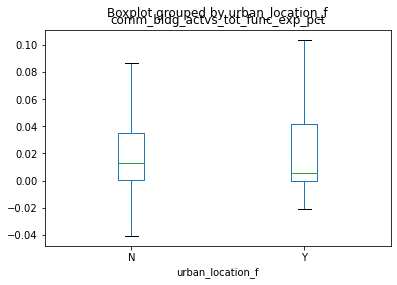

In [22]:
## Check the distibution of the data as boxplot:
dfJoin.boxplot(by='urban_location_f', column=['comm_bldg_actvs_tot_func_exp_pct'],showfliers=False, grid = False)


In [24]:
    
# Second t-test for Question 1

#comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct, "urben vs. rural""


# First t-test:
#comm_bldg_actvs_tot_func_exp_pct, "urben vs. rural""

## ttest for community benefit (rural vs urban)
comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct_rural=dfJoin_rural['comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']
comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct_urban=dfJoin_urban['comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']

res1 = ttest_ind(comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct_rural.dropna(), comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct_urban.dropna())
print(f'\n Significance Test:\n')
print(res1)

# Null hypothesis (H_0)
# There is no difference in Community health improvement services and community benefit operations as % of total functional expenses between rural and urban hospitals.
## Alternative hypthesis (H_1)  There is difference in Community health improvement services and community benefit operations as % of total functional expenses between rural and urban hospitals.

# Conclusion: As we can see the  p value for this test is not significant(statistic=0.9150113820331441, pvalue=0.3601875974245423), which means that we DONT REJECT THE NULL HYPOTHISES
# THE DIFERENCE IN THE MEANS IS BY CHANCE AND NOT STATISTCALLY SIGNIFICANT
#The measures to be used are:

#comm_bldg_actvs_tot_func_exp_pct - Community building activities as % of total functional expenses

#comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct - Community health improvement services and community benefit operations as % of total functional expenses




 Significance Test:

Ttest_indResult(statistic=0.9150113820331441, pvalue=0.3601875974245423)


<AxesSubplot:title={'center':'comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct'}, xlabel='urban_location_f'>

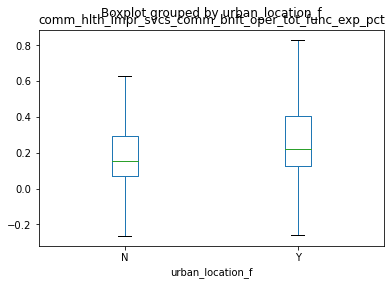

In [25]:
## Check the distibution of the data as boxplot:
dfJoin.boxplot(by='urban_location_f', column=['comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct'],showfliers=False, grid = False)

## As you can see from box plot, there is not big difference in distribution of comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct between rural ad urben hostital. 

In [42]:
## Third T test for Question 1 

#comm_bldg_actvs_tot_func_exp_pct, "ME_rural vs. NY_rural"
## Select the ME and only rural hostitals

values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME
location = ['N']
dfJoin_ME_rural = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(location)]
## Select the NY and only rural hostitals
values = ['NY']
dfJoin_NY = dfJoin[dfJoin['state'].isin(values)]
location = ['N']
dfJoin_NY_rural = dfJoin_NY[dfJoin_NY['urban_location_f'].isin(location)]

## Compute t test

comm_bldg_actvs_tot_func_exp_pct_ME_rural = dfJoin_ME_rural['comm_bldg_actvs_tot_func_exp_pct']
comm_bldg_actvs_tot_func_exp_pct_NY_rural =dfJoin_NY_rural['comm_bldg_actvs_tot_func_exp_pct']

## Compute T-test

res2 = ttest_ind(comm_bldg_actvs_tot_func_exp_pct_ME_rural.dropna(), comm_bldg_actvs_tot_func_exp_pct_NY_rural.dropna())
print(f'\n Significance Test:\n')
print(res2)


# Null hypothesis (H_0)
# There is no difference in Community health improvement services and community benefit operations as % of total functional expenses between ME and NY fro rural hospitals.
## Alternative hypthesis (H_1)  There is difference in Community health improvement services and community benefit operations as % of total functional expenses between
#between ME and NY fro rural hospitals

# Conclusion: As we can see the  p value for this test is not significant(statistic=-1.4457493243463087, pvalue=0.14882870266332238), which means that we DONT REJECT THE NULL HYPOTHISES
# THE DIFERENCE IN THE MEANS IS BY CHANCE AND NOT STATISTCALLY SIGNIFICANT





 Significance Test:

Ttest_indResult(statistic=-1.4457493243463087, pvalue=0.14882870266332238)


<AxesSubplot:title={'center':'comm_bldg_actvs_tot_func_exp_pct'}, xlabel='state'>

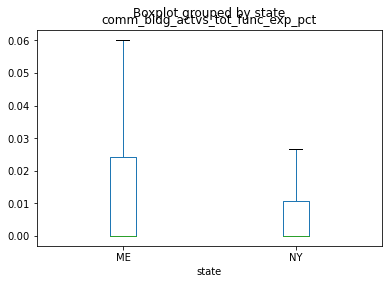

In [43]:
## Check the distibution of the data as boxplot:
frames = [dfJoin_ME_rural, dfJoin_NY_rural]

result = pd.concat(frames)

result.boxplot(by='state', column=['comm_bldg_actvs_tot_func_exp_pct'],showfliers=False, grid = False)

## As you can see from box plot, there is not big difference in distribution of comm_bldg_actvs_tot_func_exp_pct between ME and NY for rural hostital.

In [44]:
## 4th T test for Question 1: 


# comm_bldg_actvs_tot_func_exp_pct, "ME_urben vs. NY_urben"

## Select the ME and only urben hostitals

values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME
location = ['Y']
dfJoin_ME_urban = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(location)]

## Select the NY and only urben hostitals
values = ['NY'] # State
dfJoin_NY = dfJoin[dfJoin['state'].isin(values)]
location = ['Y'] # Urben
dfJoin_NY_urban = dfJoin_NY[dfJoin_NY['urban_location_f'].isin(location)]


### 

## Compute t test

comm_bldg_actvs_tot_func_exp_pct_ME_urban = dfJoin_ME_urban['comm_bldg_actvs_tot_func_exp_pct']
comm_bldg_actvs_tot_func_exp_pct_NY_urban =dfJoin_NY_urban['comm_bldg_actvs_tot_func_exp_pct']

## Compute T-test

res3 = ttest_ind(comm_bldg_actvs_tot_func_exp_pct_ME_urben.dropna(), comm_bldg_actvs_tot_func_exp_pct_NY_urben.dropna())
print(f'\n Significance Test:\n')
print(res3)

# For Sun: Adapt the this part
# Null hypothesis (H_0)
# There is no difference in Community building activities as % of total functional expenses benefit between ME and NY for  urban hospitals.
# Alternative hypthesis (H_1)  There is difference in Community building activities as % of total functional expenses between ME and NY for  urban hospitals
# between rural and urban hospitals.

# Conclusion: As we can see the  p value for this test is significant(statistic=-1.1586447724649418, pvalue=0.24675293178178287), which means that we DONT REJECT THE NULL HYPOTHISES
# THE DIFERENCE IN THE MEANS IS BY CHANCE AND NOT STATISTCALLY SIGNIFICANT





 Significance Test:

Ttest_indResult(statistic=-1.1586447724649418, pvalue=0.24675293178178287)


<AxesSubplot:title={'center':'comm_bldg_actvs_tot_func_exp_pct'}, xlabel='state'>

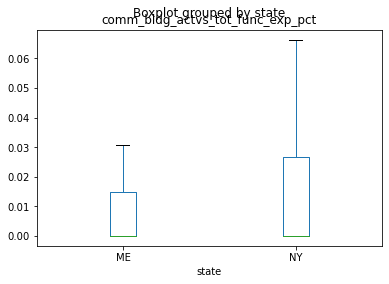

In [45]:
## Check the distibution of the data using boxplot:
frames = [dfJoin_ME_urban, dfJoin_NY_urban]

result = pd.concat(frames)

result.boxplot(by='state', column=['comm_bldg_actvs_tot_func_exp_pct'],showfliers=False, grid = False)

## As you can see from box plot, there is not big difference in distribution of comm_bldg_actvs_tot_func_exp_pct between ME and NY for rural hostital

In [10]:
values= ['Y']
dfJoin_urban = dfJoin[dfJoin['urban_location_f'].isin(values)]

values= ['N']
dfJoin_rural = dfJoin[dfJoin['urban_location_f'].isin(values)]


In [57]:
data_with_index2.info()
#dfJoin.info()
#dfJoin_ME.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113272 entries, AL to WY
Columns: 162 entries, Unnamed: 0_x to updated_dt_y
dtypes: float64(37), int64(87), object(38)
memory usage: 140.9+ MB


In [58]:
########################################################################Question2########################################################################

#  Is variation in the Ratio of Patient Care to Non-patient Care Community Benefits between Maine and other states significant by the rural flag? 
# YOU NEED TO CALCULATE THE T-TEST FOR THIS MEASUREMENT BETWEEN me & ny AS WELL
values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME

## All the other states: Remove Maine
data_with_index = dfJoin.set_index("state")
dfJoin_otherstates= data_with_index.drop("ME")

## Get only rural data for ME and other states:
location = ['N']
dfJoin_ME_rural = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(location)]

dfJoin_otherstates_rural = dfJoin_otherstates[dfJoin_otherstates['urban_location_f'].isin(location)]





rat_pat_care_npat_care_comm_bnfts_ME_rural = dfJoin_ME_rural['rat_pat_care_npat_care_comm_bnfts']
rat_pat_care_npat_care_comm_bnfts_dfJoin_otherstates_rural=dfJoin_otherstates_rural['rat_pat_care_npat_care_comm_bnfts']

# First T-test 

#rat_pat_care_npat_care_comm_bnfts, "ME_rural vs vs OtherStates_rural"


res4 = ttest_ind(rat_pat_care_npat_care_comm_bnfts_ME_rural.dropna(), rat_pat_care_npat_care_comm_bnfts_dfJoin_otherstates_rural.dropna())
print(f'\n Significance Test:\n')
print(res4)


# Null hypothesis (H_0)
# There is no difference in Ratio of Patient Care to Non-patient Care Community Benefits between Maine and other states for rural hospitals
## Alternative hypthesis (H_1)  There is difference in the Ratio of Patient Care to Non-patient Care Community Benefits between Maine and other states for rural hospitals

# Conclusion: As we can see the  p value for this test is significant(statistic=0.009643665434110944, pvalue=0.9923056561987667), which means that we DONT REJECT THE NULL HYPOTHISES
# THE DIFERENCE IN THE MEANS IS BY CHANCE AND NOT STATISTCALLY SIGNIFICANT







 Significance Test:

Ttest_indResult(statistic=0.009643665434110944, pvalue=0.9923056561987667)


In [6]:
# Second T test for Q2
#rat_pat_care_npat_care_comm_bnfts, "ME_Urban  vs OtherStates_Urban"

values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME

## All the other states: Remove Maine
data_with_index = dfJoin.set_index("state")
dfJoin_otherstates= data_with_index.drop("ME")

## Get only urben data for ME and other states:
location = ['Y']
dfJoin_ME_urban = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(location)]

dfJoin_otherstates_urban = dfJoin_otherstates[dfJoin_otherstates['urban_location_f'].isin(location)]





rat_pat_care_npat_care_comm_bnfts_ME_urben = dfJoin_ME_urban['rat_pat_care_npat_care_comm_bnfts']
rat_pat_care_npat_care_comm_bnfts_dfJoin_otherstates_urben=dfJoin_otherstates_urban['rat_pat_care_npat_care_comm_bnfts']




res5 = ttest_ind(rat_pat_care_npat_care_comm_bnfts_ME_urben.dropna(), rat_pat_care_npat_care_comm_bnfts_dfJoin_otherstates_urben.dropna())
print(f'\n Significance Test:\n')
print(res5)


# Null hypothesis (H_0)
# There is no difference in Ratio of Patient Care to Non-patient Care Community Benefits between Maine and other states for urben hospitals
## Alternative hypthesis (H_1)  There is difference in Ratio of Patient Care to Non-patient Care Community Benefits between Maine and other states for urben hosptials and is statistically
# Significant

# Conclusion: As we can see the  p value for this test is significant(statistic=2.0439202900538134, pvalue=0.0409645389773264), which means that we reject the null hypothesis
## and accept the alternative hypothesis







 Significance Test:

Ttest_indResult(statistic=2.0439202900538134, pvalue=0.0409645389773264)


In [ ]:
########################################################################Question3########################################################################

##  Is variation in the amount of total revenue spent between Maine and other states significant? Calculate t-test (1); also by rural flag (so a total of 3 t-tests)


## T test1: 
total revenue spent, "ME vs. otherStates"


## T test2: 
total revenue spent, "ME_rural vs. otherStates_rural"


## ## T test3: 
total revenue spent, "ME_Urben vs. otherStates_Urben"


In [23]:
## ## T test1 for Question 3: 
# YOU NEED TO CALCULATE THE T-TEST FOR THIS MEASUREMENT BETWEEN me & ny AS WELL 

## T test1: 
# total revenue spent, "ME vs. otherStates" 

## Subest data frame to get Maine
values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME

## All the other states: Remove Maine
data_with_index = dfJoin.set_index("state")
dfJoin_otherstates= data_with_index.drop("ME")



### Get this specific column and do the t-test


tot_revenue_ME = dfJoin_ME['tot_revenue']
tot_revenue_dfJoin_otherstates=dfJoin_otherstates['tot_revenue']




res6 = ttest_ind(tot_revenue_ME.dropna(), tot_revenue_dfJoin_otherstates.dropna())
print(f'\n Significance Test:\n')
print(res6)


# Null hypothesis (H_0)
# There is no difference in Total revenue spend between Maine and other states hospitals.
## Alternative hypthesis (H_1)  There is difference in Total revenue spend between Maine and other states hospitals.

# Conclusion: As we can see the  p value for this test is significant(statistic=-13.453193499598466, pvalue=3.1712806385563817e-41), which means that we reject the null hypothesis
## and accept the alternative hypothesis
 



 Significance Test:

Ttest_indResult(statistic=-13.453193499598466, pvalue=3.1712806385563817e-41)


In [24]:
## ## T test2 for Question 3: 


# T test 2
#total revenue spent, "ME_urben vs. otherStates_ruben" 

## Subest data frame to get Maine
values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME

## All the other states: Remove Maine
data_with_index = dfJoin.set_index("state")
dfJoin_otherstates= data_with_index.drop("ME")



## Get only urben data for ME and other states:
location = ['Y']
dfJoin_ME_urban = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(location)]

dfJoin_otherstates_urban = dfJoin_otherstates[dfJoin_otherstates['urban_location_f'].isin(location)]


### Get this specific column and do the t-test


tot_revenue_ME_urban = dfJoin_ME_urban['tot_revenue']
dfJoin_otherstates_urban = dfJoin_otherstates_urban['tot_revenue']




res7 = ttest_ind(tot_revenue_ME_urban.dropna(), dfJoin_otherstates_urban.dropna())
print(f'\n Significance Test:\n')
print(res7)


# Null hypothesis (H_0)
# There is no difference in Total revenue spend between ME and other states for urben hospitals. 
## Alternative hypthesis (H_1)  There is difference in Total revenue spend between ME and other states for urben hospitals..

# Conclusion: As we can see the  p value for this test is significant(statistic=-9.216697682309931, pvalue=3.1315119076239927e-20), which means that we reject the null hypothesis
## and accept the alternative hypothesis







 Significance Test:

Ttest_indResult(statistic=-9.216697682309931, pvalue=3.1315119076239927e-20)


In [25]:
## ## T test3 for Question 3: 


# T test 3
#total revenue spent, "ME_rural vs. otherStates_rural" 

## Subest data frame to get Maine
values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME

## All the other states: Remove Maine
data_with_index = dfJoin.set_index("state")
dfJoin_otherstates= data_with_index.drop("ME")



## Get only urben data for ME and other states:
location = ['N']
dfJoin_ME_rural = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(location)]

dfJoin_otherstates_rural = dfJoin_otherstates[dfJoin_otherstates['urban_location_f'].isin(location)]


### Get this specific column and do the t-test


tot_revenue_ME_rural = dfJoin_ME_rural['tot_revenue']
dfJoin_otherstates_rural = dfJoin_otherstates_rural['tot_revenue']




res8 = ttest_ind(tot_revenue_ME_rural.dropna(), dfJoin_otherstates_rural.dropna())
print(f'\n Significance Test:\n')
print(res8)


# Null hypothesis (H_0)
# There is no difference in Total revenue spend between ME and other states for rural  hospitals.
## Alternative hypthesis (H_1)  There is difference in Total revenue spend  between ME and other states for rural  hospitals.

# Conclusion: As we can see the  p value for this test is significant(statistic=-11.83467709454309, pvalue=3.0642040466622237e-32), which means that we reject the null hypothesis
## and accept the alternative hypothesis



 Significance Test:

Ttest_indResult(statistic=-11.83467709454309, pvalue=3.0642040466622237e-32)


In [ ]:
########################################################################Question4########################################################################

# Question 4: Is variation in the amount of Unreimbursed costs spent between Maine and other states significant? Calculate t-test (1); also by rural flag (so a total of 3 t-tests)
# YOU NEED TO CALCULATE THE T-TEST FOR THIS MEASUREMENT BETWEEN me & ny AS WELL

##  T test1


"Unreimbursed costs", "ME vs. OtherStates"


# T Test2:

"Unreimbursed costs", "ME_rural vs. OtherStates_rural"


# T Test3:

"Unreimbursed costs", "ME_urben vs. OtherStates_urben"




In [26]:
##  T test1 from Q4

##  T test1


"unreim_costs", "ME vs. OtherStates"

## Subest data frame to get Maine
values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME

## All the other states: Remove Maine
data_with_index = dfJoin.set_index("state")
dfJoin_otherstates= data_with_index.drop("ME")


unreim_costs_ME= dfJoin_ME['unreim_costs']
unreim_costs_dfJoin_otherstates = dfJoin_otherstates['unreim_costs']




res9 = ttest_ind(unreim_costs_ME.dropna(), unreim_costs_dfJoin_otherstates.dropna())
print(f'\n Significance Test:\n')
print(res9)


# Null hypothesis (H_0)
# There is no difference in the amount of Unreimbursed costs spent between Maine's and other states  hospitals.
## Alternative hypthesis (H_1)  There is difference in the amount of Unreimbursed costs spent between Maine and other states's hospitals.

# Conclusion: As we can see the  p value for this test is significant(statistic=-6.204008102519282, pvalue=5.523192994777237e-10), which means that we reject the null hypothesis
## and accept the alternative hypothesis







 Significance Test:

Ttest_indResult(statistic=-6.204008102519282, pvalue=5.523192994777237e-10)


In [27]:
# T Test2 from Question 4

"Unreimbursed costs", "ME_rural vs. OtherStates_rural"

# T Test2:

"Unreimbursed costs", "ME_rural vs. OtherStates_rural"



## Subest data frame to get Maine
values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME

## All the other states: Remove Maine
data_with_index = dfJoin.set_index("state")
dfJoin_otherstates= data_with_index.drop("ME")



## Get only urben data for ME and other states:
location = ['N']
dfJoin_ME_rural = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(location)]

dfJoin_otherstates_rural = dfJoin_otherstates[dfJoin_otherstates['urban_location_f'].isin(location)]



####

unreim_costs_ME_rural= dfJoin_ME_rural['unreim_costs']
unreim_costs_dfJoin_otherstates_rural = dfJoin_otherstates_rural['unreim_costs']




res10 = ttest_ind(unreim_costs_ME_rural.dropna(), unreim_costs_dfJoin_otherstates_rural.dropna())
print(f'\n Significance Test:\n')
print(res10)

# Null hypothesis (H_0)
# There is no difference in the amount of Unreimbursed costs spent between Maine and other states for rural hospitals.
## Alternative hypthesis (H_1)  There is difference in the amount of Unreimbursed costs spent  between Maine and other states for rural hospitals.


# Conclusion: As we can see the  p value for this test is significant(statistic=-3.0233723563232, pvalue=0.0025019251153546936), which means that we reject the null hypothesis
## and accept the alternative hypothesis





 Significance Test:

Ttest_indResult(statistic=-3.0233723563232, pvalue=0.0025019251153546936)


In [28]:
# T Test3 from Question4:

"Unreimbursed costs", "ME_urben vs. OtherStates_urben"

## Subest data frame to get Maine
values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME

## All the other states: Remove Maine
data_with_index = dfJoin.set_index("state")
dfJoin_otherstates= data_with_index.drop("ME")



## Get only urben data for ME and other states:
location = ['Y']
dfJoin_ME_urben = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(location)]

dfJoin_otherstates_urben = dfJoin_otherstates[dfJoin_otherstates['urban_location_f'].isin(location)]



####

unreim_costs_ME_urben= dfJoin_ME_urben['unreim_costs']
unreim_costs_dfJoin_otherstates_urben = dfJoin_otherstates_urben['unreim_costs']




res11 = ttest_ind(unreim_costs_ME_urben.dropna(), unreim_costs_dfJoin_otherstates_urben.dropna())
print(f'\n Significance Test:\n')
print(res11)

# For Sun: Adapt the this part
# Null hypothesis (H_0)
# There is no difference in the amount of Unreimbursed costs spent between Maine and other states for urban hospitals.
## Alternative hypthesis (H_1)  There is difference in the amount of Unreimbursed costs spent between Maine and other states  for urban hospitals.

# Conclusion: As we can see the  p value for this test is significant(statistic=-4.505095502654704, pvalue=6.643178253319487e-06), which means that we reject the null hypothesis
## and accept the alternative hypothesis









 Significance Test:

Ttest_indResult(statistic=-4.505095502654704, pvalue=6.643178253319487e-06)
